# Unsupervised Machine Learning 

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

In [4]:
# set grey layout with white grid for all plots
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('ggplot')
ggplot_styles = {'axes.facecolor': '8d8d8d',} 
plt.rcParams.update(ggplot_styles)

In [5]:
data = pd.read_csv(r"C:\Users\Lenovo\Documents\INDE DATA\firstfulldatasetINDIA.csv")
#We make a copy of the file and work on it
data = data.copy()
data.head()

,Sector,State,State-District,Household size,Household type,Religion,Social group,Whether owns any non-agricultural enterprise,Whether acquired any major durable goods,Household usual monthly consumer expenditure(Rs.),...,electrical and lighting accessories_365days,equipment for recreation_365days,furniture and fixtures_365days,jewellery and ornaments_365days,kitchen equipment_365days,miscellaneous durables_365days,other machines for household work_365days,productive equipment_365days,sports and medical equipment_365days,transport equipment_365days
0,Rural,JAMMU & KASHMIR,Punch,6,Rural : non-agriculture,Islam,others,no,no,9000.0,...,NaN,NaN,250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rural,JAMMU & KASHMIR,Punch,5,Rural : non-agriculture,Islam,others,no,no,10000.0,...,NaN,NaN,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Rural,JAMMU & KASHMIR,Punch,6,Rural : non-agriculture,others,Scheduled Castes,no,yes,100000.0,...,NaN,NaN,300.0,NaN,NaN,200.0,NaN,NaN,NaN,NaN
3,Rural,JAMMU & KASHMIR,Punch,8,Rural : Self employed in : agriculture,Islam,Scheduled Tribes,yes,no,4000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rural,JAMMU & KASHMIR,Punch,9,Rural : non-agriculture,Islam,Scheduled Tribes,no,no,7500.0,...,NaN,NaN,700.0,NaN,NaN,400.0,NaN,NaN,NaN,NaN


Check dataset

Sample dataset to 10% to make modeling easier

In [6]:
data = data.sample(frac=.1, axis=0, random_state=0)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6739 entries, 59458 to 59650
Data columns (total 45 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Sector                                             6739 non-null   object 
 1   State                                              6739 non-null   object 
 2   State-District                                     6739 non-null   object 
 3   Household size                                     6739 non-null   int64  
 4   Household type                                     6739 non-null   object 
 5   Religion                                           6739 non-null   object 
 6   Social group                                       6739 non-null   object 
 7   Whether owns any non-agricultural enterprise       6739 non-null   object 
 8   Whether acquired any major durable goods           6739 non-null   object 
 9   Hou

## Data cleaning & EDA

In [8]:
data.isna().sum()

Sector                                                  0
State                                                   0
State-District                                          0
Household size                                          0
Household type                                          0
Religion                                                0
Social group                                            0
Whether owns any non-agricultural enterprise            0
Whether acquired any major durable goods                0
Household usual monthly consumer expenditure(Rs.)       1
TV 8 radio services_30                               2037
air fare-30                                          6731
astrology_30                                         6627
barber_30                                             834
beauty treatment_30                                  5022
bus fare_30                                          2156
communication_30                                      242
computer servi

In [9]:
num_data = data.select_dtypes(exclude=['object'])
num_data

,Household size,Household usual monthly consumer expenditure(Rs.),TV 8 radio services_30,air fare-30,astrology_30,barber_30,beauty treatment_30,bus fare_30,communication_30,computer services_30,...,electrical and lighting accessories_365days,equipment for recreation_365days,furniture and fixtures_365days,jewellery and ornaments_365days,kitchen equipment_365days,miscellaneous durables_365days,other machines for household work_365days,productive equipment_365days,sports and medical equipment_365days,transport equipment_365days
59458,4,10000.0,120.0,NaN,NaN,120.0,NaN,1050.0,350.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52838,2,8670.0,NaN,NaN,NaN,NaN,132.0,NaN,62.0,42.0,...,NaN,NaN,NaN,150.0,NaN,150.0,NaN,NaN,NaN,NaN
63923,8,25000.0,180.0,NaN,NaN,170.0,NaN,800.0,175.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175000.0
10570,5,6500.0,NaN,NaN,NaN,20.0,45.0,150.0,100.0,NaN,...,NaN,NaN,800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63667,2,10000.0,250.0,NaN,NaN,100.0,NaN,NaN,300.0,NaN,...,NaN,NaN,NaN,NaN,NaN,180.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3314,3,6500.0,260.0,NaN,101.0,30.0,950.0,120.0,450.0,NaN,...,NaN,NaN,NaN,2000.0,900.0,900.0,NaN,NaN,NaN,NaN
44543,3,4500.0,100.0,NaN,NaN,30.0,NaN,120.0,160.0,NaN,...,50.0,NaN,NaN,175.0,NaN,NaN,NaN,NaN,NaN,3100.0
10594,5,3500.0,NaN,NaN,NaN,50.0,NaN,80.0,160.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6663,6,12500.0,150.0,NaN,NaN,240.0,NaN,120.0,650.0,10.0,...,800.0,NaN,1600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check data distribution in both columns

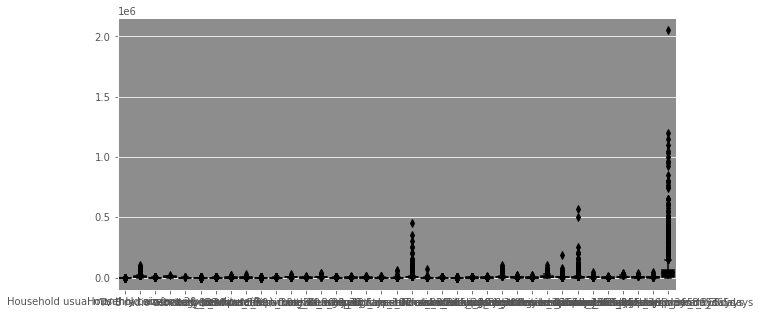

In [10]:
sns.boxplot(data=num_data, color='black')
plt.show()

<AxesSubplot:ylabel='Household size'>

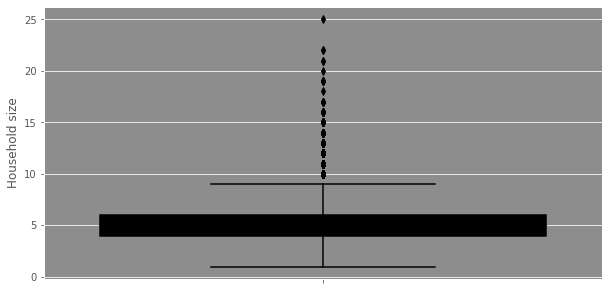

In [11]:
sns.boxplot(y='Household size', data=data, color='black')

<AxesSubplot:ylabel='TV 8 radio services_30'>

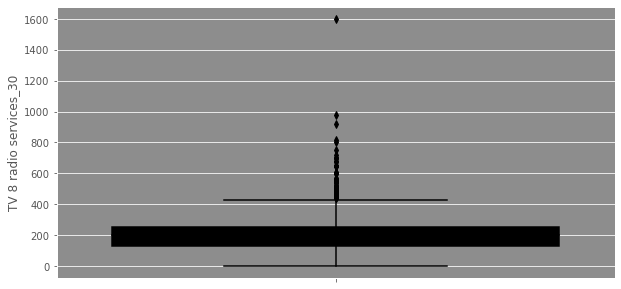

In [12]:
sns.boxplot(y='TV 8 radio services_30', data=data, color='black')

Scatter plot of clean data 

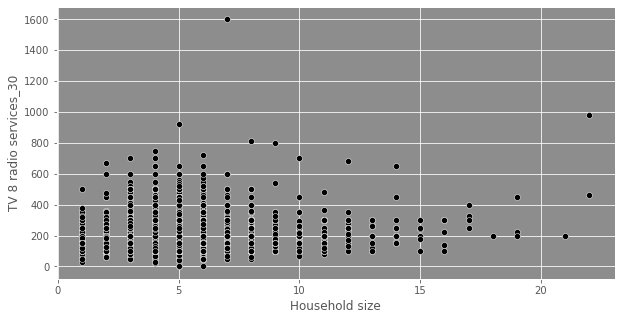

In [13]:
sns.scatterplot(data=data, x='Household size', y='TV 8 radio services_30', color='black')
plt.show()

There are clustering tendencies in the dataset, let's build clustering models to identify these clusters.

## Modeling

Assign modeling variables to X

In [14]:
X=data[['Household size','TV 8 radio services_30']]
X = X.fillna(0)

In [15]:
data['TV 8 radio services_30'].unique()

array([1.20e+02,      nan, 1.80e+02, 2.50e+02, 1.60e+02, 1.50e+02,
       1.00e+02, 5.50e+02, 1.30e+02, 2.00e+02, 5.00e+02, 2.20e+02,
       3.00e+02, 2.60e+02, 3.50e+02, 1.70e+02, 2.10e+02, 7.00e+01,
       1.75e+02, 4.50e+02, 5.00e+01, 2.30e+02, 4.40e+02, 1.25e+02,
       2.40e+02, 3.25e+02, 2.80e+02, 7.00e+02, 1.10e+02, 1.33e+02,
       1.40e+02, 5.20e+02, 2.70e+02, 2.15e+02, 1.90e+02, 2.12e+02,
       1.00e+00, 4.00e+02, 3.40e+02, 6.50e+02, 6.00e+01, 8.00e+01,
       6.80e+01, 2.45e+02, 3.20e+02, 3.30e+02, 6.50e+01, 1.77e+02,
       2.90e+02, 1.95e+02, 1.65e+02, 3.10e+02, 4.85e+02, 1.85e+02,
       2.25e+02, 4.80e+02, 1.45e+02, 8.30e+01, 7.50e+01, 0.00e+00,
       3.70e+02, 2.75e+02, 1.15e+02, 2.95e+02, 2.55e+02, 3.80e+02,
       6.00e+02, 9.00e+01, 4.30e+02, 2.16e+02, 3.05e+02, 2.31e+02,
       7.50e+02, 5.60e+02, 3.60e+02, 6.80e+02, 3.90e+02, 4.60e+02,
       2.65e+02, 3.15e+02, 2.99e+02, 5.70e+02, 4.65e+02, 1.05e+02,
       3.65e+02, 2.00e+01, 2.08e+02, 4.20e+02, 9.20e+02, 1.60e

### Clustering with KMeans

In [70]:
#Creation of loop to find the right cluster
from sklearn.cluster import KMeans

dict_model={}
for i in range (2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    key="kmeans"+str(i)
    dict_model[key] = kmeans.labels_

In [71]:
dict_model

{'kmeans2': array([0, 0, 1, ..., 0, 1, 1]),
 'kmeans3': array([2, 0, 2, ..., 0, 2, 1]),
 'kmeans4': array([2, 1, 2, ..., 1, 2, 0]),
 'kmeans5': array([0, 1, 4, ..., 1, 0, 4]),
 'kmeans6': array([3, 1, 0, ..., 1, 3, 5]),
 'kmeans7': array([6, 0, 3, ..., 0, 3, 1]),
 'kmeans8': array([6, 0, 1, ..., 0, 3, 7]),
 'kmeans9': array([5, 1, 7, ..., 1, 2, 0]),
 'kmeans10': array([4, 1, 2, ..., 1, 7, 3])}

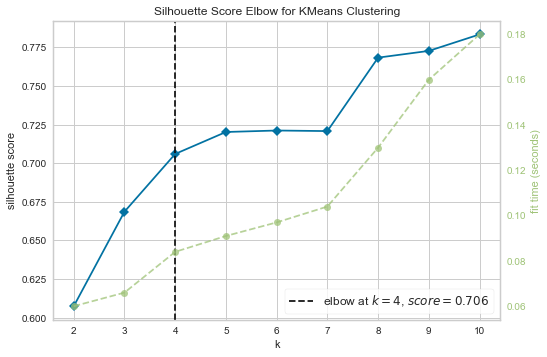

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [72]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()

visualizer = KElbowVisualizer(estimator = kmeans, k = (2,11), metric='silhouette')
visualizer.fit(X)
visualizer.poof()

Elbow indicates an optimal number of clusters of 2 with a silhouette score of 0.721.

In [73]:



# fitting KMeans with 2 clusters
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X) #y-pred=kmeans.labels_

data['kmeans_cluster'] = kmeans.labels_
k_centers = kmeans.cluster_centers_

k_centers



array([[  4.72515723, 153.69842767],
       [  4.8398289 ,   1.72005703],
       [  5.02611684, 297.45910653]])

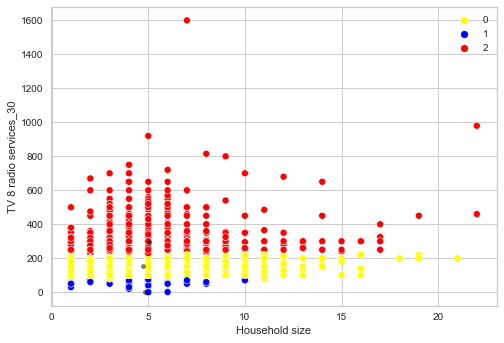

In [74]:

# plot clusters on dataset plot 
#  dans le scatter plot des observations, les deux dimensions x et y- hue: les 3 clusters, la palette donc 3 couleur
# dans le scatter des centroids: les centroids est un arrays, 1er colonne, les X, 2e colonne les Y

fig, ax = plt.subplots()
sns.scatterplot(data=data, x='Household size', y='TV 8 radio services_30', hue=y_kmeans, palette=['yellow', 'blue', 'red'], ax=ax)
#sns.scatterplot(x=k_centers[:, 0], y=k_centers[:, 1], palette='blue', size=200, ax=ax)
plt.scatter(k_centers[:, 0], k_centers[:, 1], c='black', s=20, alpha=0.5)
plt.show()

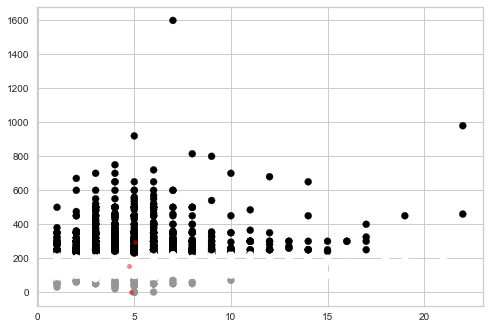

In [75]:

# plot clusters on dataset plot 
#  dans le scatter plot des observations, les deux dimensions x et y- hue: les 3 clusters, la palette donc 3 couleur
# dans le scatter des centroids: les centroids est un arrays, 1er colonne, les X, 2e colonne les Y

fig, ax = plt.subplots()
plt.scatter(data=data, x='Household size', y='TV 8 radio services_30',c = y_kmeans)
#sns.scatterplot(x=k_centers[:, 0], y=k_centers[:, 1], palette='blue', size=200, ax=ax)
plt.scatter(k_centers[:, 0], k_centers[:, 1], c='red', s=20, alpha=0.5)
plt.show()


### Clustering with DBScan

In [76]:
from sklearn.cluster import DBSCAN


In [91]:

k=0
for eps in range (1,5):
    for min_samples in range (2,5):
        k=k+1
        db = DBSCAN(eps=eps/100, min_samples=min_samples)
        print("db"+str(k))
        print(db)
        db.fit(X)
        key3="db"+str(k)
        dict_model[key3] = db.labels_
        cl=len(np.unique(db.labels_))
        print("number of clusters: ", cl )
    


dict_model

db1
DBSCAN(eps=0.01, min_samples=2)
number of clusters:  291
db2
DBSCAN(eps=0.01, min_samples=3)
number of clusters:  223
db3
DBSCAN(eps=0.01, min_samples=4)
number of clusters:  181
db4
DBSCAN(eps=0.02, min_samples=2)
number of clusters:  291
db5
DBSCAN(eps=0.02, min_samples=3)
number of clusters:  223
db6
DBSCAN(eps=0.02, min_samples=4)
number of clusters:  181
db7
DBSCAN(eps=0.03, min_samples=2)
number of clusters:  291
db8
DBSCAN(eps=0.03, min_samples=3)
number of clusters:  223
db9
DBSCAN(eps=0.03, min_samples=4)
number of clusters:  181
db10
DBSCAN(eps=0.04, min_samples=2)
number of clusters:  291
db11
DBSCAN(eps=0.04, min_samples=3)
number of clusters:  223
db12
DBSCAN(eps=0.04, min_samples=4)
number of clusters:  181


{'kmeans2': array([0, 0, 1, ..., 0, 1, 1]),
 'kmeans3': array([2, 0, 2, ..., 0, 2, 1]),
 'kmeans4': array([2, 1, 2, ..., 1, 2, 0]),
 'kmeans5': array([0, 1, 4, ..., 1, 0, 4]),
 'kmeans6': array([3, 1, 0, ..., 1, 3, 5]),
 'kmeans7': array([6, 0, 3, ..., 0, 3, 1]),
 'kmeans8': array([6, 0, 1, ..., 0, 3, 7]),
 'kmeans9': array([5, 1, 7, ..., 1, 2, 0]),
 'kmeans10': array([4, 1, 2, ..., 1, 7, 3]),
 'db1': array([ 0,  1,  2, ...,  3, 60, 25], dtype=int64),
 'db2': array([ 0,  1,  2, ...,  3, 59, 25], dtype=int64),
 'db3': array([ 0,  1, -1, ...,  2, 57, 24], dtype=int64),
 'db4': array([ 0,  1,  2, ...,  3, 60, 25], dtype=int64),
 'db5': array([ 0,  1,  2, ...,  3, 59, 25], dtype=int64),
 'db6': array([ 0,  1, -1, ...,  2, 57, 24], dtype=int64),
 'db7': array([ 0,  1,  2, ...,  3, 60, 25], dtype=int64),
 'db8': array([ 0,  1,  2, ...,  3, 59, 25], dtype=int64),
 'db9': array([ 0,  1, -1, ...,  2, 57, 24], dtype=int64),
 'db10': array([ 0,  1,  2, ...,  3, 60, 25], dtype=int64),
 'db11': arr

In [ ]:
sns.scatterplot(data=data, x='Household size', y='TV 8 radio services_30', hue=y_dbs, palette=['yellow', 'blue'], ax=ax)
#sns.scatterplot(x=k_centers[:, 0], y=k_centers[:, 1], palette='blue', size=200, ax=ax)



eps_d=[]
for eps in range (1,20):
    for min_samples in range (2,20):
        db = DBSCAN(eps=eps/100, min_samples=min_samples).fit(iris_pd)
        cl=len(np.unique(db.labels_))
        eps_d.append([eps/100,min_samples, cl])
    
        
eps_d
    
df_db=pd.DataFrame(eps_d, columns=["e","ms","cl"])
df_db["cl"].value_counts()

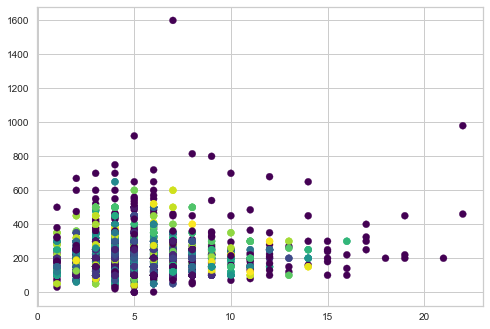

In [92]:
# fitting to splot


dbs= DBSCAN(eps=0.01, min_samples=2)
dbs.fit(X)
y_dbs = dbs.labels_ #y-pred=kmeans.labels_
#cl=y_dbs.nunique() #nombre de labels

data['dbs_cluster'] = dbs.labels_

fig, ax = plt.subplots()

plt.scatter(data=data, x='Household size', y='TV 8 radio services_30',c = y_dbs, cmap='viridis')

plt.show()



In [90]:
data['dbs_cluster'] = dbs.labels_
clusters = data['dbs_cluster'].reset_index()
clusters

,index,dbs_cluster
0,59458,0
1,52838,1
2,63923,2
3,10570,3
4,63667,4
...,...,...
6734,3314,145
6735,44543,48
6736,10594,3
6737,6663,60


###  Clustering WITH GAUSSIAN MIXTURE MODEL

In [79]:
# find the optimal numbers of clusters with GAUSSIAN
from sklearn.mixture import GaussianMixture


for i in range (2,11):
    gmm = GaussianMixture(n_components=i)
    gmm.fit(X)
    key="gmm"+str(i)
    dict_model[key] = gmm.predict(X)

dict_model


{'kmeans2': array([0, 0, 1, ..., 0, 1, 1]),
 'kmeans3': array([2, 0, 2, ..., 0, 2, 1]),
 'kmeans4': array([2, 1, 2, ..., 1, 2, 0]),
 'kmeans5': array([0, 1, 4, ..., 1, 0, 4]),
 'kmeans6': array([3, 1, 0, ..., 1, 3, 5]),
 'kmeans7': array([6, 0, 3, ..., 0, 3, 1]),
 'kmeans8': array([6, 0, 1, ..., 0, 3, 7]),
 'kmeans9': array([5, 1, 7, ..., 1, 2, 0]),
 'kmeans10': array([4, 1, 2, ..., 1, 7, 3]),
 'db1': array([ 0,  1,  2, ...,  3, 60, 25], dtype=int64),
 'db2': array([ 0,  1,  2, ...,  3, 59, 25], dtype=int64),
 'db3': array([ 0,  1, -1, ...,  2, 57, 24], dtype=int64),
 'db4': array([ 0,  1,  2, ...,  3, 60, 25], dtype=int64),
 'db5': array([ 0,  1,  2, ...,  3, 59, 25], dtype=int64),
 'db6': array([ 0,  1, -1, ...,  2, 57, 24], dtype=int64),
 'db7': array([ 0,  1,  2, ...,  3, 60, 25], dtype=int64),
 'db8': array([ 0,  1,  2, ...,  3, 59, 25], dtype=int64),
 'db9': array([ 0,  1, -1, ...,  2, 57, 24], dtype=int64),
 'db10': array([ 0,  1,  2, ...,  3, 60, 25], dtype=int64),
 'db11': arr

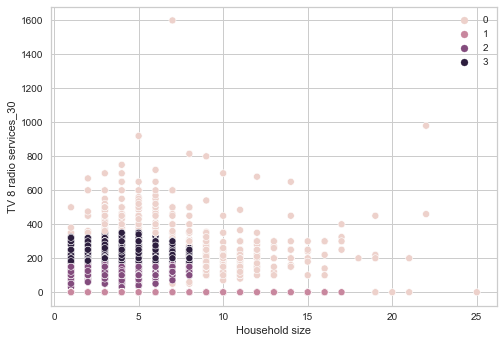

In [94]:
# Fitting Gaussian with 2 clusters
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)
gmm.fit(X)
y_gmm = gmm.predict(X)

data['gmm_cluster'] = gmm.predict(X)

# plot clusters on dataset plot
fig, ax = plt.subplots()
sns.scatterplot(data=X, x='Household size', y='TV 8 radio services_30', hue=y_gmm, cmap="plasma", ax=ax)
plt.show()

## Clustering with AgglomerativeClustering

In [80]:
# find the optimal numbers of clusters for AC
from sklearn.cluster import AgglomerativeClustering

for i in range (2,7):
    agc = AgglomerativeClustering(n_clusters=i)
    agc.fit(X)
    key1="agc"+str(i)
    dict_model[key1] = agc.labels_



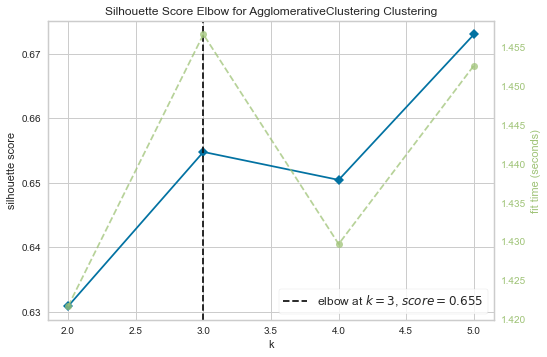

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [53]:
from yellowbrick.cluster import KElbowVisualizer

agc = AgglomerativeClustering()

visualizer = KElbowVisualizer(estimator = agc, k = (2,6), metric='silhouette')
visualizer.fit(X)
visualizer.poof()

In [40]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)

array([0, 3, 0, ..., 3, 0, 2], dtype=int64)

Text(0, 0.5, 'X2X2')

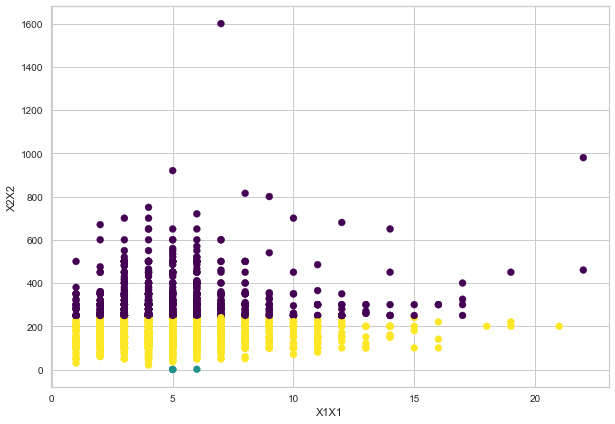

In [41]:
#AGGLOMEATIVECLUSTERING
from sklearn.cluster import AgglomerativeClustering

agc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  #3: so only 3 label
agc.fit_predict(X)
y_agglomerative=agc.labels_


plt.figure(figsize=(10, 7))  
plt.scatter(data=data, x='Household size', y='TV 8 radio services_30', c=y_agglomerative,  cmap='viridis') 
plt.xlabel("X1X1")
plt.ylabel("X2X2")

## Model Comparison

In [65]:
def unsupervised_metrics(X, y_pred):
    """
    Function to evaluate models based on different metrics:
    Homogeneity, Completeness, V-measure, adjusted_rand, AMI, 
    Silhouette Coefficient, Variance Ratio Criterion, Fowlkes Mallows
    
    """
    from sklearn import metrics
    from sklearn.metrics import silhouette_score, calinski_harabasz_score

    score_ss = metrics.silhouette_score(X, y_pred)
    score_vrc = metrics.calinski_harabasz_score(X, y_pred)
    
    print("Silhouette Coefficient: %0.3f" % score_ss)
    print('Variance Ratio Criterion: %0.3f' % score_vrc)


In [81]:
for key in dict_model:
    print('\n', key)
    unsupervised_metrics(X=X, y_pred=dict_model[key])
    


 kmeans2
Silhouette Coefficient: 0.607
Variance Ratio Criterion: 12043.612

 kmeans3
Silhouette Coefficient: 0.669
Variance Ratio Criterion: 15189.932

 kmeans4
Silhouette Coefficient: 0.706
Variance Ratio Criterion: 21374.210

 kmeans5
Silhouette Coefficient: 0.720
Variance Ratio Criterion: 26976.235

 kmeans6
Silhouette Coefficient: 0.720
Variance Ratio Criterion: 28345.395

 kmeans7
Silhouette Coefficient: 0.721
Variance Ratio Criterion: 33718.702

 kmeans8
Silhouette Coefficient: 0.769
Variance Ratio Criterion: 42134.990

 kmeans9
Silhouette Coefficient: 0.773
Variance Ratio Criterion: 57860.325

 kmeans10
Silhouette Coefficient: 0.783
Variance Ratio Criterion: 69739.513

 db1
Silhouette Coefficient: 0.936
Variance Ratio Criterion: 201.786

 db2
Silhouette Coefficient: 0.897
Variance Ratio Criterion: 200.512

 db3
Silhouette Coefficient: 0.860
Variance Ratio Criterion: 211.605

 db4
Silhouette Coefficient: 0.936
Variance Ratio Criterion: 201.786

 db5
Silhouette Coefficient: 0.897

## Cluster analysis

In [ ]:
# check cluster distribution
data['kmeans_cluster'].value_counts()

0    62026
1     4358
Name: kmeans_cluster, dtype: int64

In [ ]:
# assign cluster variables
cluster0 = data[data['kmeans_cluster']==0]
cluster1 = data[data['kmeans_cluster']==1]

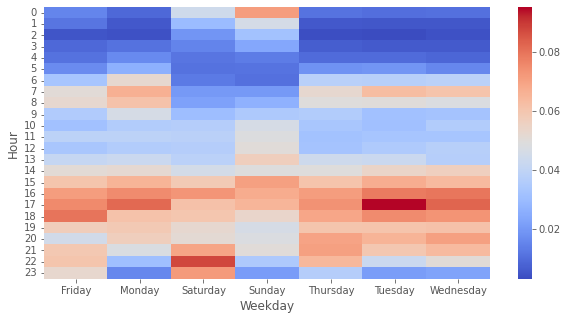

In [ ]:
# Plot pickup peaks for cluster1
sns.heatmap(pd.crosstab(cluster0.religion, cluster0.state, normalize='columns'), cmap='coolwarm')
plt.show()

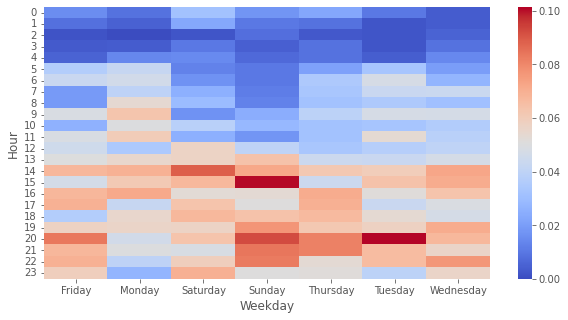

In [ ]:
# Plot pickup peaks for cluster1
sns.heatmap(pd.crosstab(cluster1.Hour, cluster1.Weekday, normalize='columns'), cmap='coolwarm')
plt.show()